In [21]:
#loading the required libaries
import pandas as pd
import seaborn as sns
import numpy as np
#loading the file, checking the data it contains and print the first 6 winners
nobel= pd.read_csv('nobel.csv')
nobel.info()
display(nobel.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [22]:
#Display the Number of price worn between 1901 and 2016
display(len(nobel))

#display the number of price won by female and male recipients
display(nobel['sex'].value_counts())

#number of price won by 15 nationalities
nobel['birth_country'].value_counts().head(15)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Italy                        17
Russia                       17
Switzerland                  16
Austria                      14
Norway                       12
Denmark                      11
China                        11
Name: birth_country, dtype: int64

In [24]:
#calculate the proportion of uk born winners per decade
nobel['Uk_born_winners']= nobel['birth_country'] == 'United Kingdom'
nobel['decade']= (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_uk_winners= nobel.groupby('decade', as_index=False)['Uk_born_winners'].mean()
display(prop_uk_winners)

,decade,Uk_born_winners
0,1900,0.052632
1,1910,0.050000
2,1920,0.129630
3,1930,0.178571
4,1940,0.069767
5,1950,0.138889
6,1960,0.088608
7,1970,0.125000
8,1980,0.051546
9,1990,0.057692


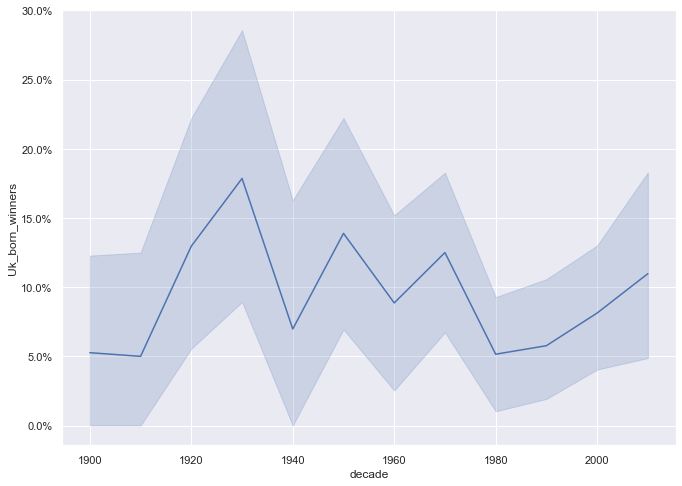

In [27]:
#set the plotting theme
sns.set()
#set size of all plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [11, 8]
#Plotting uk born winners using lineplots
ax= sns.lineplot(data= nobel, x='decade', y='Uk_born_winners')
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


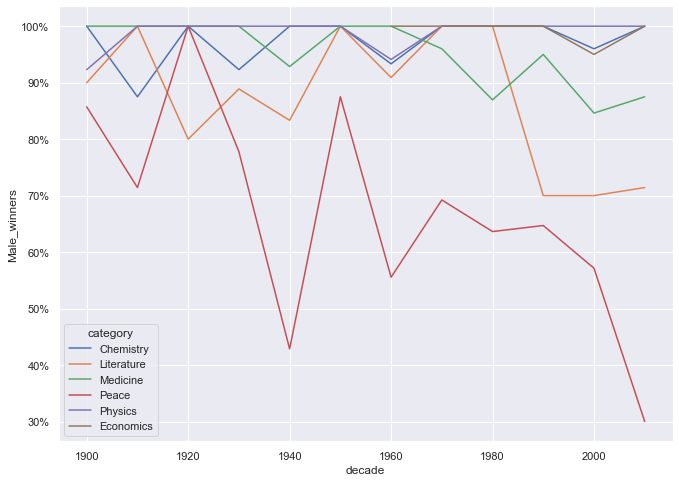

In [31]:
#calculating female laureates proportion per decade
nobel['Male_winners'] = nobel['sex'] == 'Male'
prop_male_winners= nobel.groupby(['decade', 'category'], as_index=False)['Male_winners'].mean()
ax=sns.lineplot(data=prop_male_winners, x= 'decade', y= 'Male_winners', hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [39]:
#bringing first woman to win a nobel price
nobel[nobel['sex']== 'Female'].nsmallest(1, 'year')


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Uk_born_winners,decade,Male_winners
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False


In [46]:
#selecting the laureate that have collected three or more prize
nobel.groupby('full_name').filter(lambda group: len(group) >= 3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,Uk_born_winners,decade,Male_winners
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


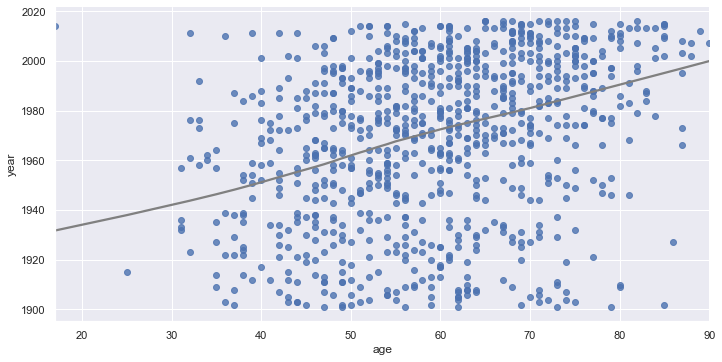

In [55]:
#calculating birth_date
nobel['birth_date']= pd.to_datetime(nobel['birth_date'])
nobel['age']= nobel['year'] - nobel['birth_date'].dt.year
sns.lmplot(x='age', y= 'year', data= nobel, lowess= True, aspect=2, line_kws={'color':'gray'})

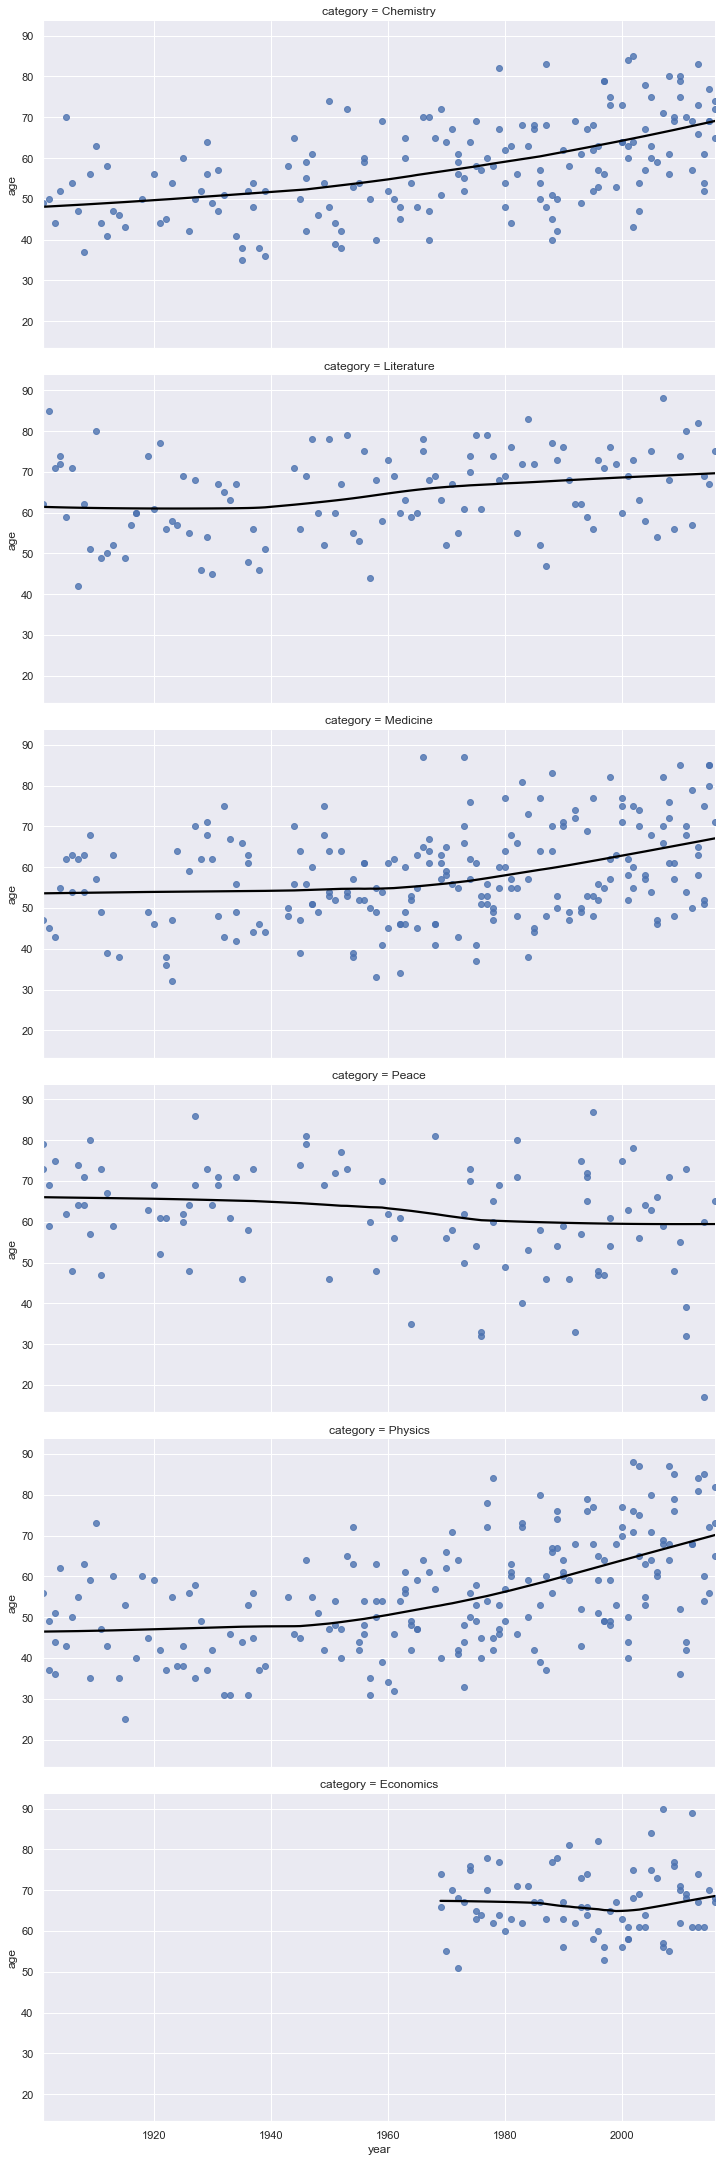

In [58]:
sns.lmplot(x='year', y='age', data=nobel, row='category', lowess= True, aspect=2, line_kws={'color':'black'})

In [59]:
#display the oldest winners of a nobel price
display(nobel.nlargest(1, 'age'))

#display the youngest winners of a nobel price
nobel.nlargest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,Uk_born_winners,decade,Male_winners,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,True,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,Uk_born_winners,decade,Male_winners,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,True,90.0
